# CO543: Image Processing - Lab 2 (2025)
### E/21/245 - MADHUSHAN S.K.A.K.

## Task 1 — Visualize Intensity & Histograms

importing the relevent libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

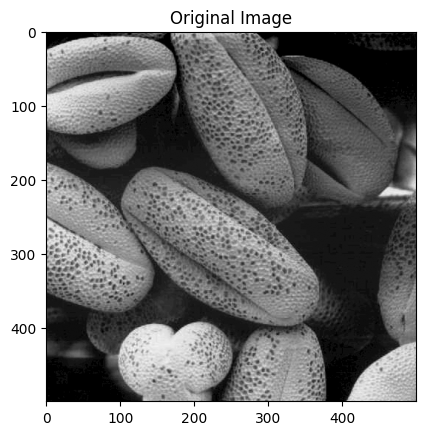

In [ ]:
img =cv2.imread('dark.tif',0)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()


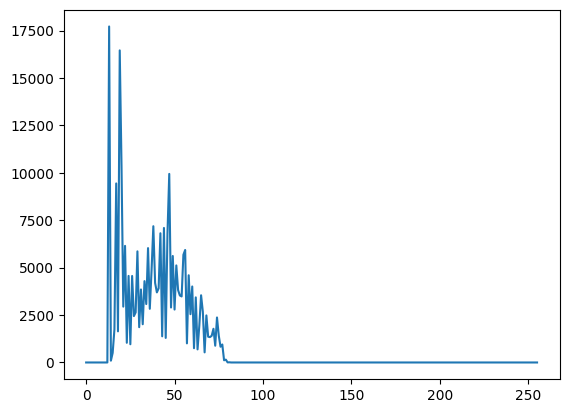

In [ ]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([img], [0], None , [256], [0,256])
plt.plot(hist)

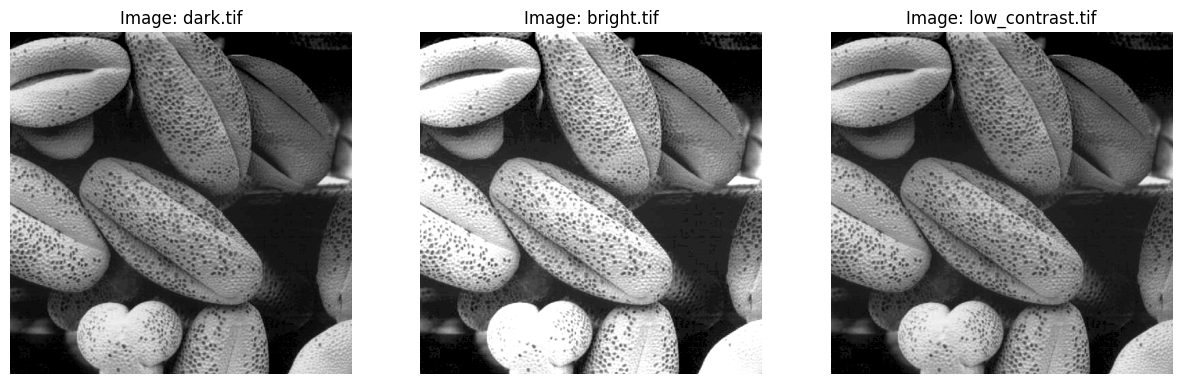

In [9]:
image_files = ['dark.tif', 'bright.tif', 'low_contrast.tif']
plt.figure(figsize=(15,5))

for i, filename in enumerate(image_files):
    img_ = cv2.imread(filename, 0)

    if img_ is None:
        print(f"Error: Could not open or find the image {filename}.")
        continue
    plt.subplot(1, len(image_files), i+1)
    plt.imshow(img_, cmap='gray')
    plt.title(f'Image: {filename}')
    plt.axis('off')
plt.show()

Let see all the given images to see how the histrogram is drawn

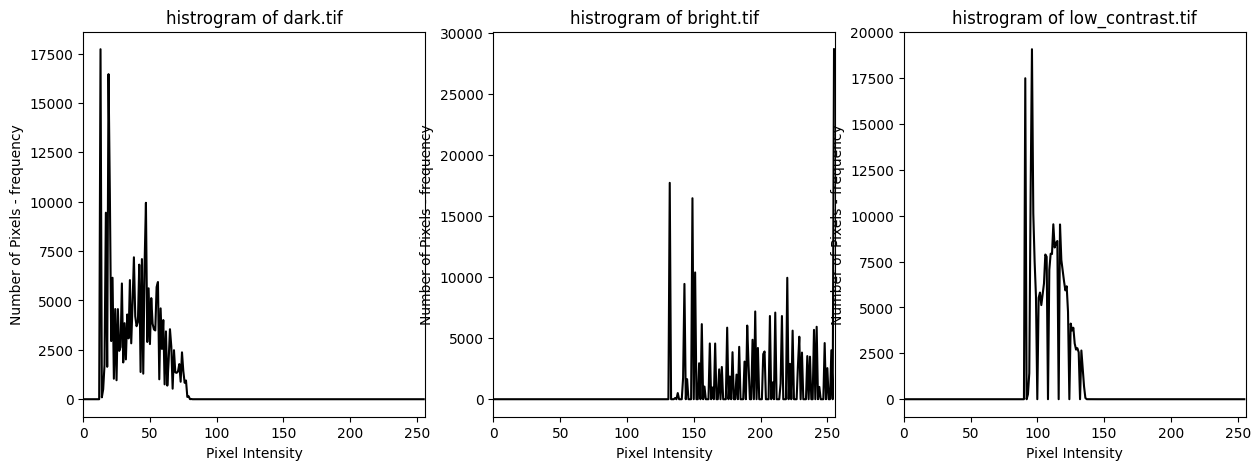

In [10]:
plt.figure(figsize=(15,5))

for i, filename in enumerate(image_files):
    img_ = cv2.imread(filename, 0)

    if img_ is None:
        print(f"Error: Could not open or find the image {filename}.")
        continue
    hist = cv2.calcHist([img_], [0], None , [256], [0,256])

    plt.subplot(1, len(image_files), i+1)
    plt.title(f"histrogram of {filename}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of Pixels - frequency')
    plt.plot(hist, color='black')
    plt.xlim([0,256])
plt.show()

### Observations

When I plotted the histograms for the three images, I immediately noticed a clear link between the graph shape and the image quality. For the dark image, the pixel data was clustered heavily on the left side, which I suppose makes sense since those are the low intensity values. In contrast, the bright image showed a distribution pushed way over to the right. I thought the most interesting one was the low contrast image; its histogram was just a narrow spike in the middle, showing that it lacked any deep blacks or bright whites. As I see it, checking this distribution is essential because it mathematically confirms the lighting conditions before I decide how to process or enhance the image.

### More to think:​
**If two images have similar histograms, can they still look visually different? Why?**

Yes, absolutely.

The Logic:- A histogram contains only statistical information (the count of pixels), but it contains zero spatial information (the location of pixels).he histogram tells you what is in the image, but not where it is.

## Task 2 — Manual Threshold & Observe Failure Cases

In [29]:

fixed_thresh_value = 100 

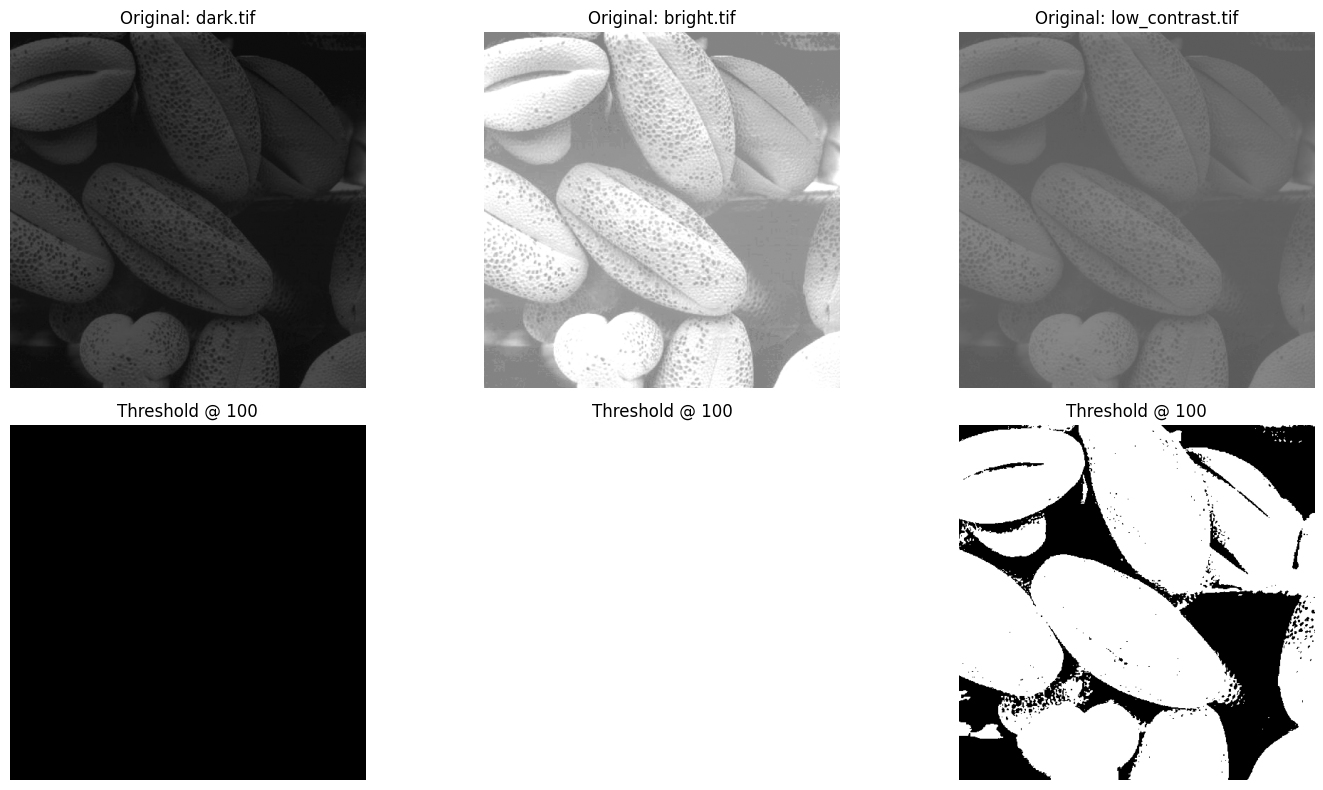

In [33]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 

for i, filename in enumerate(image_files):
    img = cv2.imread(filename, 0)
    
    # Thresholding
    _, binary_img = cv2.threshold(img, fixed_thresh_value, 255, cv2.THRESH_BINARY)
    
    # Plot Original (Top Row)
    axes[0, i].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0, i].set_title(f"Original: {filename}")
    axes[0, i].axis('off')

    # Plot Thresholded (Bottom Row)
    axes[1, i].imshow(binary_img, cmap='gray', vmin=0, vmax=255)
    axes[1, i].set_title(f"Threshold @ {fixed_thresh_value}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()